In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/MasterThesis/Data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [5]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**Principal Component Analysis for Dimentionality Reduction**

In [15]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
df_3d=pca.transform(df)

In [17]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

In [18]:
sample = df_3d

**Elbow Implimentation with Sum of Squared Error**

In [29]:
SSE={}
K = range(1,10)
for k in K :
    SSE[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    #print(labels)
    #print(sample_transformed)
    for i in range(0,k):
        #print('shit')
        cluster_datapoints = sample_transformed[labels==i]
        #print(cluster_datapoints)
        #Mean distance of data points in this cluster from center
        cluster_mean = cluster_datapoints[:,i].mean()
        print('cluster mean ='+str(cluster_mean))
        #Calculate Sum of Squared error by substracting cluster mean 
        #from distance of each point from respective centers 
        for datapoint in cluster_datapoints:
            SSE[k]+= (datapoint[i]-cluster_mean)**2
    print(SSE)

cluster mean =2.0594781802737896
{1: 136.0522772662991}
cluster mean =1.1234418906422632
cluster mean =0.490954447220812
{1: 136.0522772662991, 2: 33.40138228970442}
cluster mean =0.6713308625843522
cluster mean =0.45632613784001
cluster mean =0.7478512443862126
{1: 136.0522772662991, 2: 33.40138228970442, 3: 19.238080719496846}
cluster mean =3.0659234441227046
cluster mean =4.111910881780666
cluster mean =1.5362503868346125
cluster mean =2.6834192235596666
{1: 136.0522772662991, 2: 33.40138228970442, 3: 19.238080719496846, 4: 23.118942822444257}
cluster mean =0.5010319058128586
cluster mean =0.45632613784001
cluster mean =0.5301673359727019
cluster mean =2.2459624063709356
cluster mean =2.3269072478707176
{1: 136.0522772662991, 2: 33.40138228970442, 3: 19.238080719496846, 4: 23.118942822444257, 5: 10.634172358808524}
cluster mean =1.1223141778842696
cluster mean =0.5633177430782744
cluster mean =2.3483074427606017
cluster mean =1.36705048520652
cluster mean =4.5978346211763625
cluster

**Ploting Elbow**

In [30]:
SSE_array=[]
slope=[]
for key,value in SSE.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[136.0522772662991, 33.40138228970442, 19.238080719496846, 23.118942822444257, 10.634172358808524, 11.17586934100977, 11.054708675796778, 7.502971858980128, 7.439578805160958]


[[2, -102.65089497659466],
 [3, -14.163301570207576],
 [4, 3.880862102947411],
 [5, -12.484770463635734],
 [6, 0.5416969822012465],
 [7, -0.12116066521299196],
 [8, -3.55173681681665],
 [9, -0.06339305381917004]]

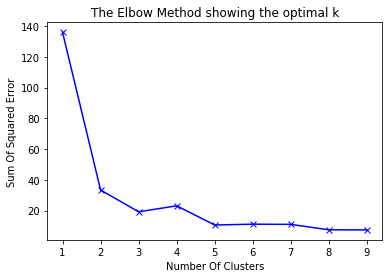

In [34]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('Number Of Clusters')
plt.ylabel('Sum Of Squared Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
slope

[[2, -102.65089497659466],
 [3, -14.163301570207576],
 [4, 3.880862102947411],
 [5, -12.484770463635734],
 [6, 0.5416969822012465],
 [7, -0.12116066521299196],
 [8, -3.55173681681665],
 [9, -0.06339305381917004]]

In [36]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
Optimal Number of Clusters = 5
Optimal Number of Clusters = 6
